In [127]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import rdkit
# Render the figure in a notebook:
%matplotlib inline  

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
import torch

In [128]:
X_train = pd.read_csv('MorganFingerprint_x_train.csv',index_col=0)
y_train = pd.read_csv('MorganFingerprint_y_train.csv',index_col=0)
y_train = y_train.drop(columns='smiles')

X_val = pd.read_csv('MorganFingerprint_x_val.csv',index_col=0)
y_val = pd.read_csv('MorganFingerprint_y_val.csv',index_col=0)
y_val = y_val.drop(columns='smiles')

In [129]:
### many of these parameters have been selected to make this similar to the previous perceptron

MLPC1 = MLPClassifier(hidden_layer_sizes=(1,), activation='identity', alpha=0, tol=0.001, solver='sgd', random_state=0, verbose=False)

### Below finish the code to fit and predict the data
MLPC1.fit(X_train,y_train)

y_MLPC1_train = MLPC1.predict(X_train)
y_MLPC1_val = MLPC1.predict(X_val)

MLPC1_train_bacc = balanced_accuracy_score(y_train,y_MLPC1_train)
MLPC1_val_bacc = balanced_accuracy_score(y_val,y_MLPC1_val)
    
print('Balanced Accuracy train:',MLPC1_train_bacc)
print('Balanced Accuracy validation:',MLPC1_val_bacc)


c:\Users\dx21006\.conda\envs\chem-ml-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Balanced Accuracy train: 0.7530769753841969
Balanced Accuracy validation: 0.6887045965927354


In [130]:
def fit_and_metric(model):
    model.fit(X_train,y_train)
    y_model_train = model.predict(X_train)
    y_model_val = model.predict(X_val)  
    model_train_bacc = balanced_accuracy_score(y_train,y_model_train)
    model_val_bacc = balanced_accuracy_score(y_val,y_model_val)
    print('Balanced Accuracy train:',model_train_bacc)
    print('Balanced Accuracy validation:',model_val_bacc)


# pytorch

In [131]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch.nn as nn
import torch.nn.functional as F

from torchmetrics.classification import Accuracy
from torchmetrics.classification import Recall

In [132]:
y_train_array = y_train['toxic'].to_numpy()
y_train_tensor = torch.Tensor(y_train_array)

y_val_array = y_val['toxic'].to_numpy()
y_val_tensor = torch.Tensor(y_val_array)

### You have been using DataFrames because these are easy to deal with but here we need the data as an array

X_train_array = X_train.to_numpy()
X_train_tensor = torch.Tensor(X_train_array)

### Now some properties will be printed so you can see how this is similar to a NumPy array

print(f'X_train_tensor = {X_train_tensor}')

print(f'Size of X_train_tensor = {X_train_tensor.size()}') 

print(f'Data type of X_train_tensor = {X_train_tensor.dtype}')

X_train_tensor = tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Size of X_train_tensor = torch.Size([3686, 2048])
Data type of X_train_tensor = torch.float32


In [133]:
X_val_array = X_val.to_numpy()
X_val_tensor = torch.Tensor(X_val_array)

### Now some properties will be printed so you can see how this is similar to a NumPy array

print(f'X_val_tensor = {X_val_tensor}')

print(f'Size of X_val_tensor = {X_val_tensor.size()}') 

print(f'Data type of X_val_tensor = {X_val_tensor.dtype}')

X_val_tensor = tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Size of X_val_tensor = torch.Size([791, 2048])
Data type of X_val_tensor = torch.float32


In [134]:
y_train_array = y_train.to_numpy()
y_train_tensor = torch.Tensor(y_train_array)

### Now some properties will be printed so you can see how this is similar to a NumPy array

print(f'y_train_tensor = {y_train_tensor}')

print(f'Size of y_train_tensor = {y_train_tensor.size()}') 

print(f'Data type of y_train_tensor = {y_train_tensor.dtype}')

y_train_tensor = tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])
Size of y_train_tensor = torch.Size([3686, 1])
Data type of y_train_tensor = torch.float32


In [135]:
y_val_array = y_val.to_numpy()
y_val_tensor = torch.Tensor(y_val_array)

### Now some properties will be printed so you can see how this is similar to a NumPy array

print(f'y_val_tensor = {y_val_tensor}')

print(f'Size of y_val_tensor = {y_val_tensor.size()}') 

print(f'Data type of y_val_tensor = {y_val_tensor.dtype}')

y_val_tensor = tensor([[0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
     

In [136]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True)

In [137]:
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
valloader = DataLoader(val_dataset, batch_size=128, shuffle=True)

In [ ]:
### effectively we are making something like LinearRegression ourselves

class DNN(nn.Module):    # this class inherits from nn.Module
    def __init__(self):
        super(DNN, self).__init__() #this calls the constructor of the parent class nn.Module
        
        # define network layers
        self.fc1 = nn.Linear(2048, 1)   # nn.Linear is a class for linear layers, i.e. input to the first hidden layer
        self.fc2 = nn.Linear(1, 2) # this is the hidden layer to the output layer with two outputs (0 or 1)
        
        # Here we are using a linear model as the activation function
    def forward(self,x):
        x = self.fc1(x)
        x = self.fc2(x)  
        return x

In [139]:
torch.manual_seed(0)
network = DNN()
network.train()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr=0.1)

num_epochs = int(100)  

for epoch in range(1,num_epochs+1):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data 
        labels = labels.squeeze()
        optimizer.zero_grad() 
        outputs = network(inputs)
        loss = criterion(outputs, labels.long()) 
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item() 
        
    avg_train_loss = running_loss / len(trainloader) 

    print('Epoch',epoch,'Loss =',avg_train_loss) 

Epoch 1 Loss = 0.6865069434560579
Epoch 2 Loss = 0.6514451894266852
Epoch 3 Loss = 0.6247225855958873
Epoch 4 Loss = 0.6004728325482073
Epoch 5 Loss = 0.5810447910736347
Epoch 6 Loss = 0.5633917265924914
Epoch 7 Loss = 0.5467274600061877
Epoch 8 Loss = 0.5322395891978823
Epoch 9 Loss = 0.517415254280485
Epoch 10 Loss = 0.5037004269402603
Epoch 11 Loss = 0.49182052447878083
Epoch 12 Loss = 0.4794221695127158
Epoch 13 Loss = 0.4699693877121498
Epoch 14 Loss = 0.4588084734719375
Epoch 15 Loss = 0.44936756532767724
Epoch 16 Loss = 0.44166883415189284
Epoch 17 Loss = 0.4318295881665986
Epoch 18 Loss = 0.4230755516167345
Epoch 19 Loss = 0.41321647578272325
Epoch 20 Loss = 0.40661656856536865
Epoch 21 Loss = 0.4014404282487672
Epoch 22 Loss = 0.38914530338912173
Epoch 23 Loss = 0.3835451839299038
Epoch 24 Loss = 0.3805674622798788
Epoch 25 Loss = 0.3732077839045689
Epoch 26 Loss = 0.36295851448486594
Epoch 27 Loss = 0.36083188961292134
Epoch 28 Loss = 0.3552379402621039
Epoch 29 Loss = 0.3509

In [140]:
def optimise_epochs(net_param, learning_rate, trainloader, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor):
    
    epoch_list = []
    avg_train_loss_list =[]
    param_bacc_train_list = []
    param_bacc_val_list = []

    max_epochs = 200
 
    net_param.train()
    criterion_param = nn.CrossEntropyLoss()
    optimizer_param = torch.optim.SGD(net_param.parameters(), lr=learning_rate) 

    for epoch in range(1,max_epochs+1):
        running_loss = 0.0
        for i, data in enumerate(trainloader):
            inputs, labels = data 
            optimizer_param.zero_grad() 
            outputs = net_param(inputs) 
            loss = criterion_param(outputs, labels.long()) 
            loss.backward() 
            optimizer_param.step() 
            running_loss += loss.item() 
            
        avg_train_loss = running_loss / len(trainloader) 
        avg_train_loss_list.append(avg_train_loss)
        epoch_list.append(epoch)

        net_param.eval()  # sets layers to evaluation mode
        with torch.no_grad():  # stops gradient tracking
            y_train_logits = net_param(x_train_tensor).detach() 
            y_train_pred = torch.argmax(y_train_logits, dim=1) 
        macro_recall = Recall(task='multiclass', num_classes=2, average='macro')

        NN_param_train_bacc = macro_recall(y_train_pred, y_train_tensor)
        #print('Balanced Accuracy train:',float(NN_param_train_bacc))
        param_bacc_train_list.append(NN_param_train_bacc)

        with torch.no_grad(): 
            y_val_logits = net_param(x_val_tensor).detach() 
            y_val_pred = torch.argmax(y_val_logits, dim=1) # If the first index is larger it will return 0 and if the second is 1 
        NN_param_val_bacc = macro_recall(y_val_pred, y_val_tensor)
        #print('Balanced Accuracy val:',float(NN_param_val_bacc))
        param_bacc_val_list.append(NN_param_val_bacc)

    plt.plot(epoch_list, avg_train_loss_list, '-o')
    plt.xlabel('Epoch')
    plt.ylabel('Average Loss Training')
    plt.show()

    plt.plot(epoch_list, param_bacc_train_list, '-o', label = 'Train')
    plt.plot(epoch_list, param_bacc_val_list, '-o', label = 'Validation', color='skyblue')
    plt.xlabel('Epoch')
    plt.ylabel('Balanced Accuracy')
    plt.legend()
    plt.show()

Balanced Accuracy train: 0.9288725852966309
Balanced Accuracy Validation: 0.6693507432937622


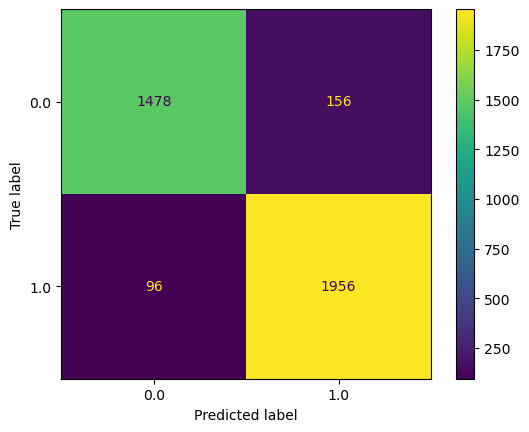

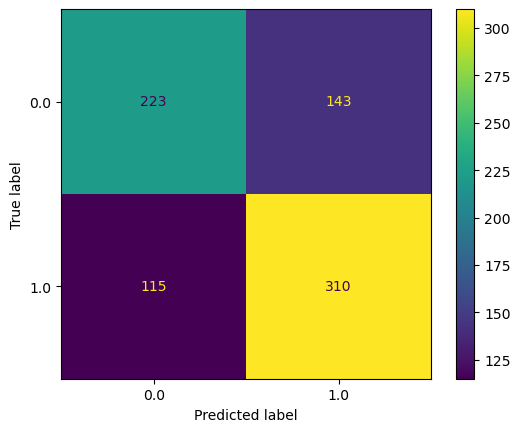

In [141]:
#test the SGD model with optimised params
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
def test_SGD(network, learning_rate, best_epochs, trainloader, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor):
    torch.manual_seed(0)
    network.train()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate)

    num_epochs = best_epochs  
    for epoch in range (1,num_epochs+1):
        running_loss = 0.0
        for i, data in enumerate(trainloader):
            inputs, labels = data
            labels = labels.squeeze() 
            optimizer.zero_grad() 
            outputs = network(inputs)
            loss = criterion(outputs, labels.long()) 
            loss.backward() 
            optimizer.step() 
            running_loss += loss.item() 
                
        avg_train_loss = running_loss / len(trainloader) 

    network.eval()
    with torch.no_grad():  # stops gradient tracking
        y_train_logits = network(x_train_tensor).detach() 
        y_train_pred = torch.argmax(y_train_logits, dim=1) 
        y_val_logits = network(x_val_tensor).detach() 
        y_val_pred = torch.argmax(y_val_logits, dim=1) 
    y_train_tensor_squeeze = y_train_tensor.squeeze()#hopefully this will make the y_train_tensor the correct shape.
    y_val_tensor_squeeze = y_val_tensor.squeeze()
    ConfusionMatrixDisplay.from_predictions(y_train_tensor, y_train_pred)
    ConfusionMatrixDisplay.from_predictions(y_val_tensor, y_val_pred)

    macro_recall = Recall(task='multiclass', num_classes=2, average='macro')

    network_train_bacc = macro_recall(y_train_pred, y_train_tensor_squeeze)
    print('Balanced Accuracy train:',float(network_train_bacc))

    network_val_bacc = macro_recall(y_val_pred, y_val_tensor_squeeze)
    print('Balanced Accuracy Validation:',float(network_val_bacc))

net_SGD_optimised = DNN()
test_SGD(net_SGD_optimised, 0.9, 75, trainloader, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor)


In [142]:
y_train_tensor = y_train_tensor.squeeze()
y_val_tensor = y_val_tensor.squeeze()

In [143]:
torch.manual_seed(0)
bacc_val = []
bacc_train = []

### create the network set the criretia and how to optimize
neti = DNN()
neti.train() ### this turns the model on for training (above there are no specific layers only involved in training but this is good practise)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(neti.parameters(), lr=0.1)
for num_epochs in range(1,50):
### set the number of epochs to run
# num_epochs = 100  
    for epoch in range(1,num_epochs+1):
        running_loss = 0.0
        for i, data in enumerate(trainloader):
            inputs, labels = data ### extacts the features and ground truth labels
            optimizer.zero_grad() ### removes gradients from previous run in backpropergation
            outputs = neti(inputs) ### gets the predictions - which is now the raw scores "logits"
            labels = labels.squeeze()
            loss = criterion(outputs, labels.long()) ### calculates the loss of the outputs with the labels
            loss.backward() ### computes the gradients for backpropagation
            optimizer.step() ### updates the model based on the gradients
            running_loss += loss.item() ### adds the loss to the running_loss 

        avg_train_loss = running_loss / len(trainloader) ### calculates the average lss for the batches

        # print('Epoch',epoch,'Loss =',avg_train_loss) ### prints the info

    neti.eval()  # sets layers to evaluation mode
    with torch.no_grad():  # stops gradient tracking
        y_train_logits = neti(X_train_tensor).detach() 
        y_train_pred = torch.argmax(y_train_logits, dim=1) # If the first index is larger it will return 0 and if the second is 1 
    ### After setting this up you can call macro_recall without having to set it up again

    macro_recall = Recall(task='multiclass', num_classes=2, average='macro')

    NN1_train_bacc = macro_recall(y_train_pred, y_train_tensor)
    print('With ', num_epochs,': Balanced Accuracy train:',float(NN1_train_bacc))
    bacc_train.append(NN1_train_bacc)

    with torch.no_grad():  # stops gradient tracking
        y_val_logits = neti(X_val_tensor).detach() 
        y_val_pred = torch.argmax(y_val_logits, dim=1) # If the first index is larger it will return 0 and if the second is 1 

    NN1_val_bacc = macro_recall(y_val_pred, y_val_tensor)
    print('With ', num_epochs,': Balanced Accuracy validation:',float(NN1_val_bacc))
    bacc_val.append(NN1_val_bacc)

With  1 : Balanced Accuracy train: 0.5366176962852478
With  1 : Balanced Accuracy validation: 0.5434490442276001
With  2 : Balanced Accuracy train: 0.6419318914413452
With  2 : Balanced Accuracy validation: 0.6380102634429932
With  3 : Balanced Accuracy train: 0.7092173099517822
With  3 : Balanced Accuracy validation: 0.6839247941970825
With  4 : Balanced Accuracy train: 0.763361930847168
With  4 : Balanced Accuracy validation: 0.7152683734893799
With  5 : Balanced Accuracy train: 0.7934232950210571
With  5 : Balanced Accuracy validation: 0.7258566617965698
With  6 : Balanced Accuracy train: 0.8223401308059692
With  6 : Balanced Accuracy validation: 0.7145483493804932
With  7 : Balanced Accuracy train: 0.8554728031158447
With  7 : Balanced Accuracy validation: 0.710562527179718
With  8 : Balanced Accuracy train: 0.8699736595153809
With  8 : Balanced Accuracy validation: 0.69538414478302
With  9 : Balanced Accuracy train: 0.8972641229629517
With  9 : Balanced Accuracy validation: 0.6933

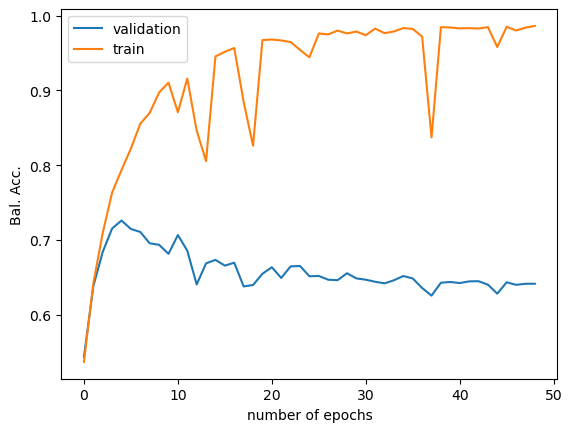

In [144]:
plt.plot(bacc_val, label="validation")
plt.plot(bacc_train, label="train")
plt.xlabel('number of epochs')
plt.ylabel('Bal. Acc.')
plt.legend()
plt.show()


In [145]:
class DNN1(nn.Module):
    def __init__(self):
        super(DNN1, self).__init__()
        self.fc1 = nn.Linear(2048, 1024)        
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(2516, 128)  
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x) # For the final layer we use raw logits for the cross entropy loss
        return x

In [146]:
net2 = DNN1()
net2.train()
criterion2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.SGD(net2.parameters(), lr=0.1)

num_epochs = 10  

for epoch in range(1,num_epochs+1):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data 
        optimizer2.zero_grad() 
        outputs = net2(inputs)
        labels = labels.squeeze()
        loss = criterion2(outputs, labels.long()) 
        loss.backward() 
        optimizer2.step() 
        running_loss += loss.item() 
        
    avg_train_loss = running_loss / len(trainloader) 

    print('Epoch',epoch,'Loss =',avg_train_loss) 

RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x256 and 2516x128)

Balanced Accuracy train: 0.9917494058609009
Balanced Accuracy Validation: 0.7136001586914062


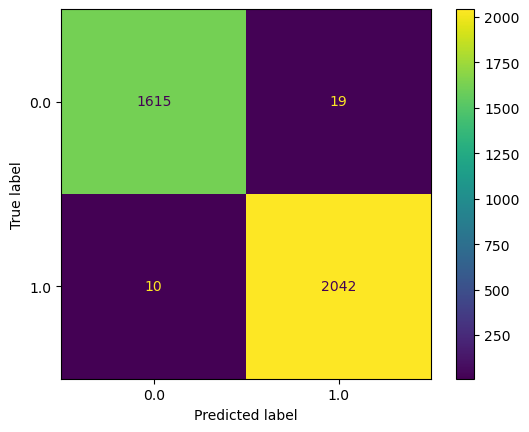

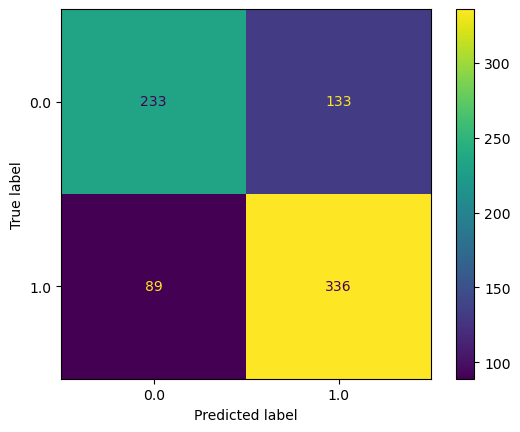

In [ ]:

test_SGD(net2, 0.9, 75, trainloader, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor)

Balanced Accuracy train: 0.9923614263534546
Balanced Accuracy Validation: 0.7188749313354492


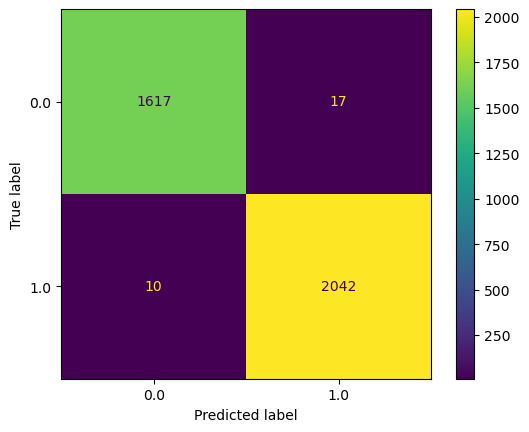

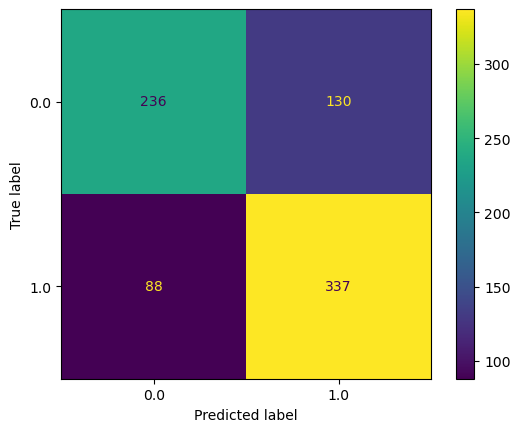

In [ ]:
#try 0.8
test_SGD(net2, 0.8, 75, trainloader, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor)

In [ ]:
test_SGD(net2, 0.8, 70, trainloader, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor) #optimised conditions

RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x256 and 2516x128)

In [ ]:
test_SGD(net2, 0.8, 250, trainloader, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor) #optimised conditions

RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x256 and 2516x128)

In [ ]:
### effectively we are making something like LinearRegression ourselves

class DNN_adam(nn.Module):    # this class inherits from nn.Module
    def __init__(self):
        super(DNN_adam, self).__init__() #this calls the constructor of the parent class nn.Module
        
        # define network layers
        self.fc1 = nn.Linear(2048, 1)   # nn.Linear is a class for linear layers, i.e. input to the first hidden layer
        self.fc2 = nn.Linear(1, 2) # this is the hidden layer to the output layer with two outputs (0 or 1)
        
        # Here we are using a linear model as the activation function
    def forward(self,x):
        x = self.fc1(x)
        x = self.fc2(x)  
        return x

In [ ]:
torch.manual_seed(0)
network = DNN_adam()
network.train()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.adam(network.parameters(), lr=0.1)

num_epochs = int(1000)  

for epoch in range(1,num_epochs+1):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data 
        labels = labels.squeeze()
        optimizer.zero_grad() 
        outputs = network(inputs)
        loss = criterion(outputs, labels.long()) 
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item() 
        
    avg_train_loss = running_loss / len(trainloader) 

    print('Epoch',epoch,'Loss =',avg_train_loss) 